Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle

### Loading and Displaying the Dataset

- Loads the dataset from the specified file path (`airline_review.csv`) using `pd.read_csv()`.
- Displays the first few rows of the dataset using `df.head()` to preview the data.

In [2]:
# Load the dataset
file_path = "C:\\Users\\ymors\\airline_review.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Unnamed: 0,rating,header,author,date,place,content,aircraft,traveller_type,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
0,0,2,service was mediocre at best,Gary Storer,2023-10-03,United Kingdom,"Just returned from Chicago, flew out 10 days ...",A380,Couple Leisure,Economy Class,Chicago to Manchester via Heathrow,2023-10-01,2,3,1,2,2,no,-1,Not Verified
1,1,2,BA standards continue to decline,A Jensen,2023-10-02,United Kingdom,BA standards continue to decline every time ...,A320,Business,Business Class,London Heathrow to Munich,2023-09-01,2,1,2,1,1,no,-1,Verified
2,2,2,"won the race to the bottom""",John Rockett,2023-10-02,United Kingdom,Awful. Business class check in queue just as...,A320,Couple Leisure,Business Class,Heathrow to Istanbul,2023-09-01,2,3,2,1,1,no,-1,Not Verified
3,3,3,Not a reliable airline,Tatiana Bobrovskaya,2023-10-02,United Kingdom,Not a reliable airline. You cannot trust the...,A320,Business,Economy Class,London to Geneva,2023-10-01,4,4,2,1,1,no,-1,Verified
4,4,1,It is a national disgrace,A Dawson,2023-09-30,United Kingdom,I take comfort in reading the last ten or so...,NaN,Couple Leisure,Business Class,Athens to London,2023-09-01,1,1,1,1,1,no,1,Verified


### Dropping Unnecessary Columns

- Drops columns that are not needed for analysis (`'header'`, `'author'`, `'date'`, etc.) using `df.drop()`.
- Displays the updated DataFrame to show the remaining columns.

In [3]:
# Drop unnecessary columns
columns_to_drop = ['header', 'author', 'date', 'place', 'content',
                   'aircraft', 'route', 'date_flown']
df = df.drop(columns=columns_to_drop, axis=1)

# Display the updated DataFrame
df.head()


,Unnamed: 0,rating,traveller_type,seat_type,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,recommended,entertainment,trip_verified
0,0,2,Couple Leisure,Economy Class,2,3,1,2,2,no,-1,Not Verified
1,1,2,Business,Business Class,2,1,2,1,1,no,-1,Verified
2,2,2,Couple Leisure,Business Class,2,3,2,1,1,no,-1,Not Verified
3,3,3,Business,Economy Class,4,4,2,1,1,no,-1,Verified
4,4,1,Couple Leisure,Business Class,1,1,1,1,1,no,1,Verified


### Mapping 'trip_verified' to Binary Values

- Converts the values in the `'trip_verified'` column to binary: `'Verified'` becomes 1 and `'Not Verified'` becomes 0.
- Displays the unique values in the `'trip_verified'` column to confirm the mapping.

In [4]:
# Map 'trip_verified' to binary values
df['trip_verified'] = df['trip_verified'].map({'Verified': 1, 'Not Verified': 0})

# Display unique values to confirm mapping
df['trip_verified'].unique()


array([ 0.,  1., nan])

### Mapping 'recommended' to Binary Values

- Converts the values in the `'recommended'` column to binary: `'yes'` becomes 1 and `'no'` becomes 0.
- Displays the unique values in the `'recommended'` column to confirm the mapping.














In [5]:
# Map 'recommended' to binary values
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})

# Display unique values to confirm mapping
df['recommended'].unique()


array([0, 1], dtype=int64)

### Separating Target Variables and Features

- Separates the target column for classification (`'recommended'`) and regression (`'rating'`).
- Extracts the `'trip_verified'` column as a separate variable.
- Stores the remaining columns as features by dropping the target columns.
- Displays the first few rows of the features.

In [6]:
# Separate target columns
target_classification = df['recommended']  # For classification
target_regression = df['rating']           # For regression

# Separate trip_verified column
trip_verified = df['trip_verified']

# Remaining features
features = df.drop(columns=['recommended', 'rating', 'trip_verified'], axis=1)

# Display the features
features.head()


,Unnamed: 0,traveller_type,seat_type,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment
0,0,Couple Leisure,Economy Class,2,3,1,2,2,-1
1,1,Business,Business Class,2,1,2,1,1,-1
2,2,Couple Leisure,Business Class,2,3,2,1,1,-1
3,3,Business,Economy Class,4,4,2,1,1,-1
4,4,Couple Leisure,Business Class,1,1,1,1,1,1


### Defining Numerical and Categorical Columns

- Defines the list of numerical columns (`'seat_comfort'`, `'cabin_staff_service'`, etc.) and categorical columns (`'traveller_type'`, `'seat_type'`).
- Prints the lists of numerical and categorical columns.

In [7]:
# Define numerical and categorical columns
numerical_columns = ['seat_comfort', 'cabin_staff_service', 'food_beverages',
                     'ground_service', 'value_for_money', 'entertainment']
categorical_columns = ['traveller_type', 'seat_type']

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)


Numerical Columns: ['seat_comfort', 'cabin_staff_service', 'food_beverages', 'ground_service', 'value_for_money', 'entertainment']
Categorical Columns: ['traveller_type', 'seat_type']


### Defining Preprocessing Pipelines

- **Numerical Pipeline**: Imputes missing values with the mean and scales the numerical features.
- **Categorical Pipeline**: Imputes missing values with the most frequent category and applies one-hot encoding.
- **ColumnTransformer**: Combines both pipelines and applies them to the respective numerical and categorical columns.







In [8]:
# Pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())                 # Scale numerical features
])

# Pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),    # Fill missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])


### Applying Preprocessing Transformations

- Applies the preprocessing steps to the features using `fit_transform()`.
- Combines the transformed numerical and categorical columns, and adds the `'trip_verified'` column.
- Creates a new DataFrame with the processed features and displays the first few rows.







In [9]:
# Apply preprocessing transformations
processed_features = preprocessor.fit_transform(features)

# Get the transformed column names
num_col_names = numerical_columns
cat_col_names = list(preprocessor.named_transformers_['cat']
                     .named_steps['onehot']
                     .get_feature_names_out(categorical_columns))
final_columns = num_col_names + cat_col_names + ['trip_verified']

# Combine processed features with 'trip_verified'
processed_features_with_trip = np.hstack([processed_features, trip_verified.values.reshape(-1, 1)])

# Create a DataFrame with the processed features
processed_df = pd.DataFrame(processed_features_with_trip, columns=final_columns)

# Display the processed DataFrame
processed_df.head()


,seat_comfort,cabin_staff_service,food_beverages,ground_service,value_for_money,entertainment,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,seat_type_Business Class,seat_type_Economy Class,seat_type_First Class,seat_type_Premium Economy,trip_verified
0,-0.495852,-0.061331,-0.745893,0.021255,-0.462621,-1.223860,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.495852,-1.266616,-0.182814,-0.471421,-1.142360,-1.223860,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.495852,-0.061331,-0.182814,-0.471421,-1.142360,-1.223860,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.833774,0.541312,-0.182814,-0.471421,-1.142360,-1.223860,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.160665,-1.266616,-0.745893,-0.471421,-1.142360,-0.246502,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Adding Targets and Saving Processed Data

- Adds the target columns (`'recommended'` for classification and `'rating'` for regression) back to the processed DataFrame.
- Fills missing values in the `'trip_verified'` column using the most frequent value (mode).
- Saves the processed classification and regression datasets to CSV files.
- Prints a confirmation message after saving the datasets.

In [10]:
# Add targets back to the processed DataFrame
processed_classification_df = processed_df.copy()
processed_classification_df['recommended'] = target_classification

processed_regression_df = processed_df.copy()
processed_regression_df['rating'] = target_regression

# Impute missing values in 'trip_verified'
processed_classification_df['trip_verified'].fillna(processed_classification_df['trip_verified'].mode()[0], inplace=True)
processed_regression_df['trip_verified'].fillna(processed_regression_df['trip_verified'].mode()[0], inplace=True)

# Save processed datasets
processed_classification_df.to_csv("C:\\Users\\ymors\\processed_classification_data.csv", index=False)
processed_regression_df.to_csv("C:\\Users\\ymors\\processed_regression_data.csv", index=False)

# Print confirmation
print("Processed datasets saved successfully.")


Processed datasets saved successfully.


### Balancing the Classification Data

- Splits the dataset into two classes (`recommended == 0` and `recommended == 1`).
- Downsamples the majority class (`class 0`) to match the size of the minority class (`class 1`).
- Combines the downsampled class with the minority class and shuffles the data for balance.
- Imputes missing values in the `'trip_verified'` column.
- Saves the balanced classification dataset to a CSV file.

In [11]:
# Balance Classification Data
df_class_0 = processed_classification_df[processed_classification_df['recommended'] == 0]
df_class_1 = processed_classification_df[processed_classification_df['recommended'] == 1]
df_class_0_downsampled = df_class_0.sample(len(df_class_1), random_state=42)
balanced_df = pd.concat([df_class_0_downsampled, df_class_1])
balanced_df = shuffle(balanced_df, random_state=42)

# Impute 'trip_verified' again in the balanced dataset
balanced_df['trip_verified'].fillna(balanced_df['trip_verified'].mode()[0], inplace=True)

# Save balanced dataset
balanced_df.to_csv("C:\\Users\\ymors\\balanced_classification_data.csv", index=False)

### Splitting and Saving Classification Data

- Splits the balanced dataset into training, validation, and test sets (70%, 15%, 15%).
- Adds the target column (`'recommended'`) back to each split.
- Saves the training, validation, and test sets to separate CSV files.
- Prints a confirmation message after saving the splits.

In [12]:
# Split balanced data into train, validation, and test sets
X_class = balanced_df.drop(columns=['recommended'])
y_class = balanced_df['recommended']

X_train_class, X_temp_class, y_train_class, y_temp_class = train_test_split(X_class, y_class, test_size=0.30, random_state=42)
X_val_class, X_test_class, y_val_class, y_test_class = train_test_split(X_temp_class, y_temp_class, test_size=0.50, random_state=42)

# Save splits
X_train_class['recommended'] = y_train_class
X_train_class.to_csv("C:\\Users\\ymors\\train_classification_data.csv", index=False)

X_val_class['recommended'] = y_val_class
X_val_class.to_csv("C:\\Users\\ymors\\val_classification_data.csv", index=False)

X_test_class['recommended'] = y_test_class
X_test_class.to_csv("C:\\Users\\ymors\\test_classification_data.csv", index=False)

# Print confirmation
print("Classification splits saved successfully.")


Classification splits saved successfully.


### Splitting and Saving Regression Data

- Splits the processed regression dataset into training, validation, and test sets (70%, 15%, 15%).
- Adds the target column (`'rating'`) back to each split.
- Saves the training, validation, and test sets to separate CSV files.
- Prints a confirmation message after saving the splits.

In [13]:
# Split processed regression data into train, validation, and test sets
X_reg = processed_regression_df.drop(columns=['rating'])
y_reg = processed_regression_df['rating']

X_train_reg, X_temp_reg, y_train_reg, y_temp_reg = train_test_split(X_reg, y_reg, test_size=0.30, random_state=42)
X_val_reg, X_test_reg, y_val_reg, y_test_reg = train_test_split(X_temp_reg, y_temp_reg, test_size=0.50, random_state=42)

# Save splits
X_train_reg['rating'] = y_train_reg
X_train_reg.to_csv("C:\\Users\\ymors\\train_regression_data.csv", index=False)

X_val_reg['rating'] = y_val_reg
X_val_reg.to_csv("C:\\Users\\ymors\\val_regression_data.csv", index=False)

X_test_reg['rating'] = y_test_reg
X_test_reg.to_csv("C:\\Users\\ymors\\test_regression_data.csv", index=False)

# Print confirmation
print("Regression splits saved successfully.")


Regression splits saved successfully.


KNN ALGORITHM

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the pre-split datasets
train_class = pd.read_csv("C:\\Users\\ymors\\train_classification_data.csv")
val_class = pd.read_csv("C:\\Users\\ymors\\val_classification_data.csv")
test_class = pd.read_csv("C:\\Users\\ymors\\test_classification_data.csv")

# Separate features (X) and target (y) for training, validation, and testing
X_train = train_class.drop(columns=['recommended'])
y_train = train_class['recommended']

X_val = val_class.drop(columns=['recommended'])
y_val = val_class['recommended']

X_test = test_class.drop(columns=['recommended'])
y_test = test_class['recommended']

# Print confirmation
print("Data loaded and prepared successfully.")

Data loaded and prepared successfully.


### Model Evaluation and Selection

- Initializes variables to track the best KNN model based on F1-score.
- Tests different values of `k` (from 1 to 10) and distance metrics (`euclidean`, `manhattan`).
- For each combination, the KNN model is trained and evaluated using accuracy, precision, recall, and F1-score.
- The best model (highest F1-score) is tracked and printed at the end.

In [16]:
# Initialize variables to track the best model
best_k = 0
best_metric = ''
best_f1_score = 0
best_model = None

# Define distance metrics to test
distance_metrics = ['euclidean', 'manhattan']

# Test different k values and distance metrics
for metric in distance_metrics:
    print(f"\nEvaluating models with distance metric: {metric}")
    for k in range(1, 11):  # Test k values from 1 to 10
        # Initialize and train KNN model
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)

        # Predict on the validation set
        y_val_pred = knn.predict(X_val)

        # Evaluate performance
        accuracy = accuracy_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)

        print(f"k={k}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1-Score={f1:.2f}")

        # Track the best model based on F1-score
        if f1 > best_f1_score:
            best_f1_score = f1
            best_k = k
            best_metric = metric
            best_model = knn

print(f"\nBest Model - Metric: {best_metric}, k={best_k}, F1-Score={best_f1_score:.2f}")


Evaluating models with distance metric: euclidean
k=1: Accuracy=0.89, Precision=0.88, Recall=0.92, F1-Score=0.90
k=2: Accuracy=0.90, Precision=0.95, Recall=0.86, F1-Score=0.90
k=3: Accuracy=0.91, Precision=0.90, Recall=0.93, F1-Score=0.92
k=4: Accuracy=0.91, Precision=0.92, Recall=0.91, F1-Score=0.92
k=5: Accuracy=0.91, Precision=0.89, Recall=0.95, F1-Score=0.92
k=6: Accuracy=0.92, Precision=0.91, Recall=0.94, F1-Score=0.93
k=7: Accuracy=0.92, Precision=0.89, Recall=0.96, F1-Score=0.92
k=8: Accuracy=0.93, Precision=0.91, Recall=0.95, F1-Score=0.93
k=9: Accuracy=0.93, Precision=0.90, Recall=0.96, F1-Score=0.93
k=10: Accuracy=0.93, Precision=0.92, Recall=0.96, F1-Score=0.94

Evaluating models with distance metric: manhattan
k=1: Accuracy=0.90, Precision=0.89, Recall=0.92, F1-Score=0.90
k=2: Accuracy=0.92, Precision=0.95, Recall=0.88, F1-Score=0.92
k=3: Accuracy=0.93, Precision=0.92, Recall=0.96, F1-Score=0.94
k=4: Accuracy=0.93, Precision=0.94, Recall=0.93, F1-Score=0.93
k=5: Accuracy=0

### Model Evaluation on Test Set

- Uses the best model (based on F1-score) to make predictions on the test set.
- Prints the classification report (including precision, recall, F1-score).
- Generates and prints the confusion matrix to evaluate the model’s performance.

In [17]:
# Use the best model to predict on the test set
y_test_pred = best_model.predict(X_test)

# Print the classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       221
           1       0.91      0.92      0.91       216

    accuracy                           0.92       437
   macro avg       0.92      0.92      0.92       437
weighted avg       0.92      0.92      0.92       437


Confusion Matrix:
[[202  19]
 [ 18 198]]


### Visualizing the Confusion Matrix

- Imports `ConfusionMatrixDisplay` to visualize the confusion matrix.
- Displays the confusion matrix using a blue color map (`cmap='Blues'`) for better readability.
- The plot is shown with a title "Confusion Matrix for KNN".

<Figure size 800x600 with 0 Axes>

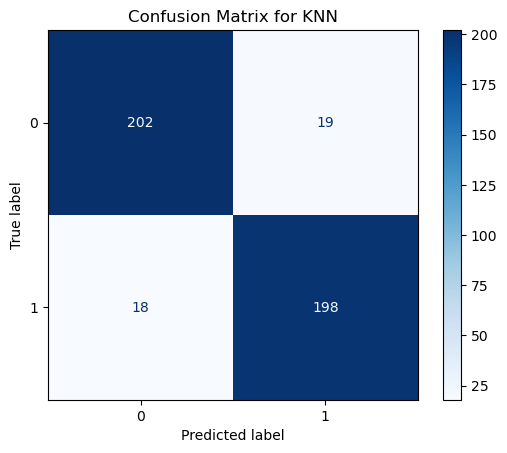

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.show()

In [19]:
# Save test set predictions to a CSV file
test_results = X_test.copy()
test_results['actual'] = y_test
test_results['predicted'] = y_test_pred
test_results.to_csv("C:\\Users\\ymors\\knn_test_predictions.csv", index=False)

print("Test predictions saved to 'C:\\Users\\ymors\\knn_test_predictions.csv'")

Test predictions saved to 'C:\Users\ymors\knn_test_predictions.csv'


DECISION TREE

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Decision Tree Model Evaluation

- Initializes and trains a `DecisionTreeClassifier` on the training set.
- Makes predictions on the validation set.
- Calculates and prints the accuracy, precision, recall, and F1-score for the validation set.







In [21]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train,y_train)

y_val_pred = decision_tree.predict(X_val)

accuracy = accuracy_score(y_val,y_val_pred)
precision = precision_score(y_val,y_val_pred)
recall = recall_score(y_val,y_val_pred)
f1 = f1_score(y_val,y_val_pred)

print(f"Validation Metrics:\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Validation Metrics:
Accuracy: 0.89, Precision: 0.88, Recall: 0.91, F1-Score: 0.90


### Hyperparameter Tuning with GridSearchCV

- Defines a parameter grid for the `DecisionTreeClassifier` with options for `criterion`, `max_depth`, and `min_samples_split`.
- Initializes `GridSearchCV` to search for the best hyperparameters using 5-fold cross-validation and F1-score as the evaluation metric.
- Fits the `GridSearchCV` on the training data and prints the best parameters found.

In [22]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Impurity criteri
    'max_depth': [None, 5, 10, 15],   # Maximum tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,  # 5-fold cross-validation
    verbose=1
)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Get the best model
best_tree = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


### Evaluating the Best Model on the Validation Set

- Uses the best decision tree model to predict on the validation set.
- Calculates and prints the accuracy, precision, recall, and F1-score for the validation set.














In [23]:
# Predict on the validation set
y_val_pred_best = best_tree.predict(X_val)

# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred_best)
precision = precision_score(y_val, y_val_pred_best)
recall = recall_score(y_val, y_val_pred_best)
f1 = f1_score(y_val, y_val_pred_best)

print(f"Validation Metrics for Best Model:\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Validation Metrics for Best Model:
Accuracy: 0.91, Precision: 0.90, Recall: 0.93, F1-Score: 0.92


### Visualizing the Decision Tree

- Plots the decision tree using `plot_tree()` with features, class names, and visual styling (colors and rounded edges).
- Sets the plot size for better visibility and adds a title.
- Displays the tree using `matplotlib`.

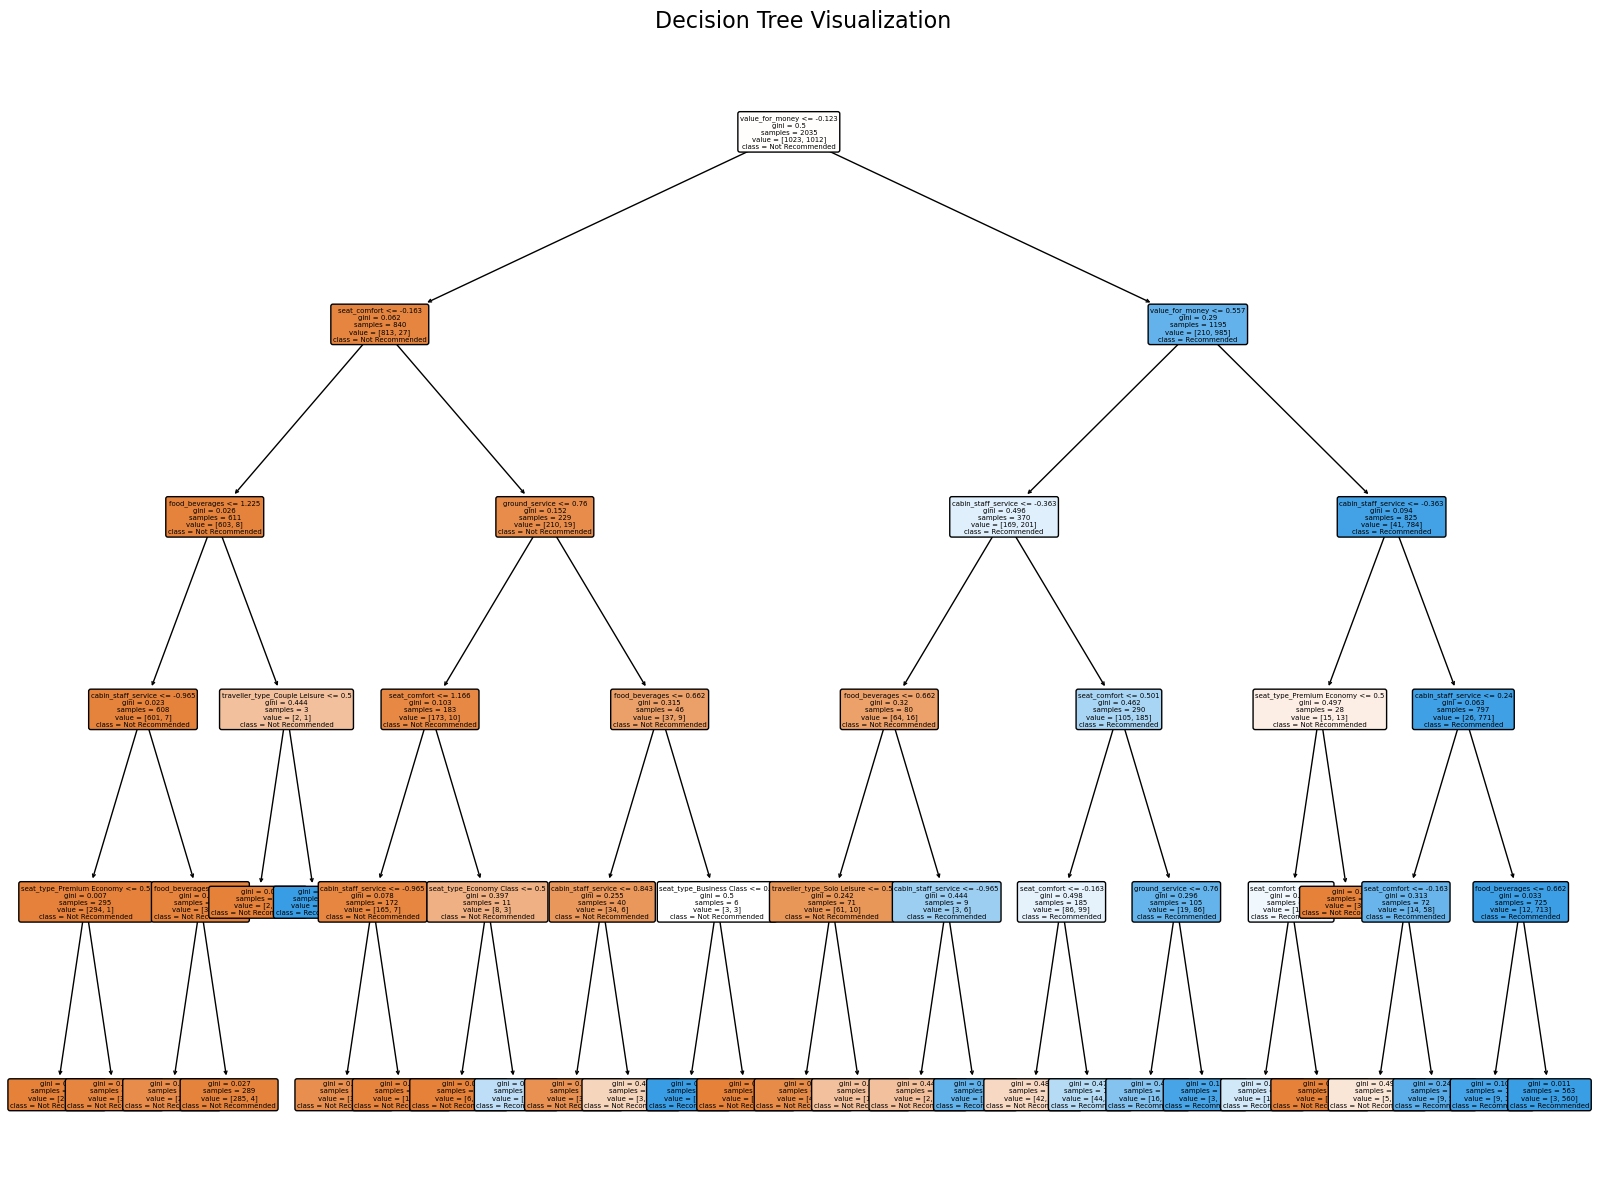

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 15))  
plot_tree(
    best_tree, 
    feature_names=X_train.columns,  
    class_names=['Not Recommended', 'Recommended'],  
    filled=True,  
    rounded=True,  
    fontsize=5 
)
plt.title("Decision Tree Visualization", fontsize=16)  
plt.show()

### Evaluating the Model on the Test Set

- Uses the best decision tree model to predict on the test set.
- Prints the classification report, including precision, recall, F1-score, and support.
- Generates and prints the confusion matrix to evaluate the model’s performance.

In [25]:
# Predict on the test set
y_test_pred = best_tree.predict(X_test)

# Print the classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       221
           1       0.92      0.90      0.91       216

    accuracy                           0.91       437
   macro avg       0.91      0.91      0.91       437
weighted avg       0.91      0.91      0.91       437


Confusion Matrix:
[[203  18]
 [ 21 195]]


### Visualizing the Confusion Matrix

- Uses `ConfusionMatrixDisplay` to visualize the confusion matrix.
- Displays the matrix with a blue color map (`cmap='Blues'`) for better readability.
- Adds a title and shows the confusion matrix plot using `matplotlib`.

<Figure size 800x600 with 0 Axes>

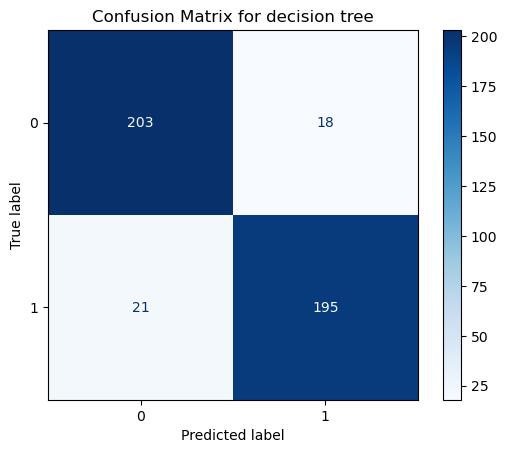

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for decision tree")
plt.show()

### Saving Test Predictions

- Combines the test features, actual labels, and predicted labels into a DataFrame.
- Saves the DataFrame to a CSV file for future reference.
- Prints a confirmation message after saving the test predictions.

In [27]:
# Save predictions along with actual labels
test_results = X_test.copy()
test_results['actual'] = y_test
test_results['predicted'] = y_test_pred
test_results.to_csv("C:\\Users\\ymors\\decision_tree_test_predictions.csv", index=False)

print("Test predictions saved to 'C:\\Users\\ymors\\decision_tree_test_predictions.csv'")

Test predictions saved to 'C:\Users\ymors\decision_tree_test_predictions.csv'


### Evaluating Naive Bayes Model

- Trains a `GaussianNB` (Naive Bayes) model on the training data.
- Predicts on the test set and prints the classification report (precision, recall, F1-score).







In [28]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_test_pred = nb_model.predict(X_test)
print("Naive Bayes Test Report:")
print(classification_report(y_test, nb_y_test_pred))

Naive Bayes Test Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       221
           1       0.89      0.91      0.90       216

    accuracy                           0.90       437
   macro avg       0.90      0.90      0.90       437
weighted avg       0.90      0.90      0.90       437



### Visualizing the Naive Bayes Confusion Matrix

- Uses `ConfusionMatrixDisplay` to visualize the confusion matrix for the Naive Bayes model.
- Displays the matrix with a blue color map (`cmap='Blues'`) for clarity.
- Adds a title and shows the plot using `matplotlib`.

<Figure size 800x600 with 0 Axes>

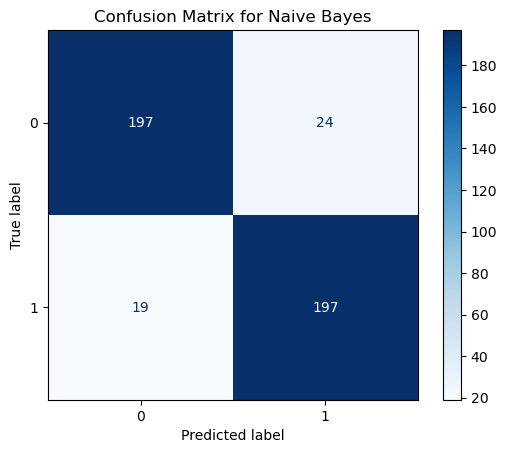

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, nb_y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

### Saving Naive Bayes Predictions

- Combines the test features, actual labels, and predicted labels from the Naive Bayes model into a DataFrame.
- Saves the DataFrame to a CSV file for future analysis.

In [30]:
# Save Naive Bayes predictions to CSV
nb_results = X_test.copy()
nb_results['actual'] = y_test
nb_results['predicted'] = nb_y_test_pred
nb_results.to_csv("C:\\Users\\ymors\\naive_bayes_predictions.csv", index=False)
print("Test predictions saved to 'C:\\Users\\ymors\\naive_bayes_predictions.csv'")

Test predictions saved to 'C:\Users\ymors\naive_bayes_predictions.csv'


### Training and Evaluating SVM Model

- Initializes an `SVC` (Support Vector Machine) model and performs a grid search to find the best hyperparameters (`C`, `gamma`, `kernel`).
- Trains the model on the training data using `GridSearchCV` with 3-fold cross-validation and accuracy as the scoring metric.
- Evaluates the best model on the validation set and prints the classification report.

In [31]:
from sklearn.svm import SVC

svm_model = SVC()
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'rbf', 'poly']}
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_
svm_y_val_pred = best_svm.predict(X_val)
print("SVM Validation Report:")
print(classification_report(y_val, svm_y_val_pred))

SVM Validation Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       210
           1       0.92      0.94      0.93       226

    accuracy                           0.93       436
   macro avg       0.93      0.93      0.93       436
weighted avg       0.93      0.93      0.93       436



### Visualizing the SVM Confusion Matrix and Grid Search Results

- **Confusion Matrix**: Uses `ConfusionMatrixDisplay` to visualize the SVM model's confusion matrix for the validation set, with a blue color map.
  
- **Grid Search Results**: Visualizes the results of the grid search for different SVM kernels (`linear`, `rbf`, `poly`). 
  - Plots a heatmap for each kernel, showing how the hyperparameters `C` and `gamma` affect the model's performance (mean test score).
  - Uses `seaborn` for heatmap visualization.

<Figure size 800x600 with 0 Axes>

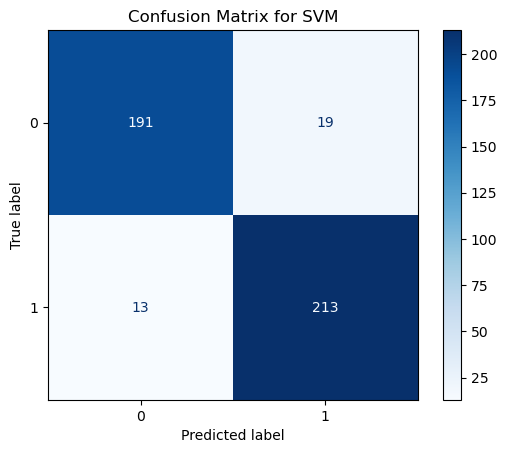

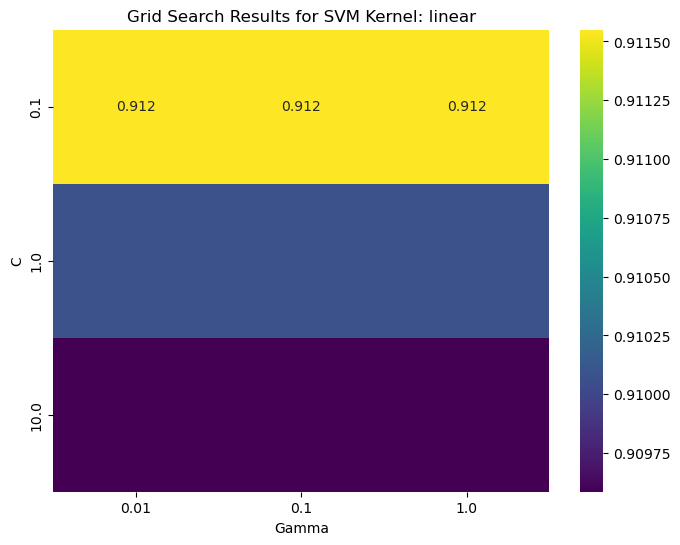

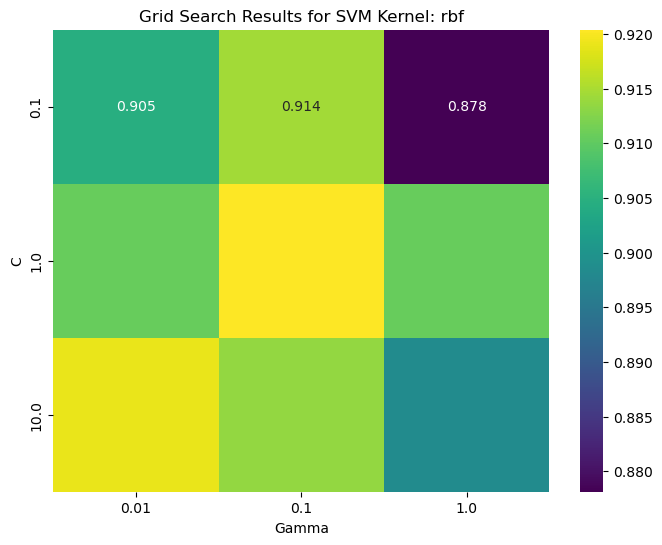

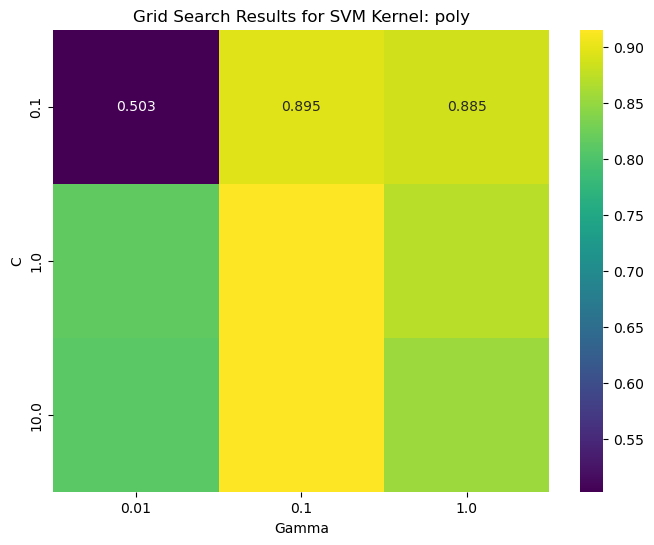

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_val_class, svm_y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.show()

# Visualize the Grid Search Results
results = grid_search_svm.cv_results_

results_df = pd.DataFrame(results)

# Filter for 'linear' kernel results and plot the heatmap for C and gamma values
for kernel in ['linear', 'rbf', 'poly']:
    kernel_results = results_df[results_df['param_kernel'] == kernel]
    pivot_table = kernel_results.pivot_table(
        index='param_C',
        columns='param_gamma',
        values='mean_test_score'
    )

    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis")
    plt.title(f"Grid Search Results for SVM Kernel: {kernel}")
    plt.xlabel('Gamma')
    plt.ylabel('C')
    plt.show()

### Evaluating SVM Model on the Test Set

- Uses the best SVM model to predict on the test set.
- Prints the classification report, including precision, recall, F1-score, and support for the test set.

svm_y_test_pred = best_svm.predict(X_test)
print("SVM Test Report:")
print(classification_report(y_test, svm_y_test_pred))

In [33]:
svm_y_test_pred = best_svm.predict(X_test)
print("SVM Test Report:")
print(classification_report(y_test, svm_y_test_pred))

SVM Test Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       221
           1       0.93      0.90      0.92       216

    accuracy                           0.92       437
   macro avg       0.92      0.92      0.92       437
weighted avg       0.92      0.92      0.92       437



### Saving SVM Predictions

- Combines the test features, actual labels, and predicted labels from the SVM model into a DataFrame.
- Saves the DataFrame to a CSV file for future analysis.







In [34]:
# Save SVM predictions to CSV
svm_results = X_test.copy()
svm_results['actual'] = y_test
svm_results['predicted'] = svm_y_test_pred
svm_results.to_csv("C:\\Users\\ymors\\svm_predictions.csv", index=False)
print("Test predictions saved to 'C:\\Users\\ymors\\svm_predictions.csv'")

Test predictions saved to 'C:\Users\ymors\svm_predictions.csv'


Performance Comparison:


K-Nearest Neighbors (KNN):

Best Parameters: k=10, Euclidean Distance
Performance:
Accuracy: 93%
Precision: 92%
Recall: 96%
F1-Score: 94%
Strengths: Excellent handling of non-linear data, highest performance metrics.
Weaknesses: Computationally expensive for large datasets, sensitive to noise.


Naive Bayes:

Performance:
Validation:
Accuracy: 91%
Precision: 90%
Recall: 93%
F1-Score: 92%
Test:
Accuracy: 92%
Precision: 92%
Recall: 92%
F1-Score: 92%
Strengths: Fast, interpretable, works well with categorical data.
Weaknesses: Struggles with correlated features or imbalanced data.


Support Vector Machine (SVM):

Best Parameters: RBF Kernel, C=10, Gamma=0.01
Performance:
Accuracy: 91%
Precision: 91%
Recall: 91%
F1-Score: 91%
Strengths: Good for high-dimensional spaces and non-linear problems.
Weaknesses: Sensitive to parameter tuning; prone to overfitting on small datasets.


Decision Tree:

Performance:
Validation:
Accuracy: 89%
Precision: 88%
Recall: 91%
F1-Score: 90%
Test:
Accuracy: 91%
Precision: 91%
Recall: 90%
F1-Score: 91%
Strengths: Easy to interpret, handles both numerical and categorical data.
Weaknesses: Prone to overfitting; can struggle with noisy data.


Insights:

Best Overall Algorithm: KNN achieved the best F1-score (94%) and accuracy (93%), making it the top performer for this dataset.
Recommendations:
For predictive performance, KNN is the best choice.
For interpretability, consider Naive Bayes or Decision Tree.
For datasets with high-dimensional features, SVM may be preferable.


Conclusion:

KNN is the best algorithm for this prediction task, offering high accuracy and recall, which are vital for minimizing false negatives. However, Naive Bayes and Decision Tree remain competitive, especially if ease of implementation or speed is prioritized.